 # ECG - Hexaxial Reference System

## Introduction

The hexaxial reference system also known as the Cabrera system is a convention to present the extremity leads of an electrocardiogram (ECG). It can determine the projected vector of a heart's electrical axis onto the frontal plane.

## Clinical Significance

When a person breathes in, the diaphragm descends and the heart becomes more vertical in the chest cavity. This change generally shifts the QRS electrical axis vertically (to the right). With increasing weight and age the axis shifts from right to left. An age and weight incongruent axis is reason to investigate the cause.

The simplest reason for odd axes are incorrectly placed electrodes in leads. This is said to occur in 0.4% to 4% of ECG recordings.

### Left Axis Deviation
Causes of Left axis deviation (LAD) include

**Left anterior fascicular block (or hemiblock):**

The left bundle branch usually consists of the left anterior, posterior fascicle and septal fascicles. LAD is caused by only the anterior half of the left bundle branch being defective. 

**Inferior myocardial infarction:**

It occurs when blood flow decreases or stops to a part of the heart, causing damage to the heart muscle through hypoxia or acidosis.

### Right Axis Deviation

**Lateral myocardial infarction**

Common symptoms are anxiety, chest pain, fatigue and shortness of breath

**Right ventricular hypertrophy**

Right ventricular hypertrophy is a heart disorder characterized by thickening of the walls of the right ventricle. It specifically affects the right ventricle, which is responsible for pumping deoxygenated blood back to the lungs. It can be caused by a lung-related condition.

**Fascicular Block**

A bundle branch block is a defect of the bundle branches or fascicles in the electrical conduction system of the heart.
Can be diagnosed by QRS interval > 120ms

**Pre-excitation syndrome**

Pre-excitation syndrome is a heart condition in which part of the cardiac ventricles are activated too early as atria and ventricles are not properly electrally isolated.

### Imports

In [14]:
import numpy as np
import math
from IPython.display import Image

## ECG axis deviation

### Vector of electrical axis

In [15]:
def electrical_axis_vector(heights:list, lead_system="einthoven"):
    """
    Returns electrical axis for the height of R peaks in different leads
    
    Args
        :lead_system: (str) Lead system - "einthoven" / "goldberger"
    Returns
        :returns: Normalized vector of electrical axis
    """
    if len(heights) != 3:
        raise AssertionError("Wrong length given for heights list")
    
    # Einthoven Lead system (default)
    if lead_system == "einthoven":
        vec =  np.matmul(heights, [[1, 0], [0.5, -3**0.5/2], [-0.5, -3**0.5/2]])
    
    # Goldberger Lead system
    elif lead_system == "goldberger":
        vec = np.matmul(heights, [[3**0.5/2, 0.5],[-3**0.5/2, 0.5], [0, -1]])
 
    else:
        raise ValueError(f"Lead system {lead_system} was not recognized")
    
    # Normalize the vector
    vec /= np.sum(np.abs(vec))
    return vec

In [24]:
electrical_axis_vector([2.1,1.8,-0.2])

array([ 0.69109415, -0.30890585])

In [43]:
electrical_axis_vector([-0.5,-1.5,2.0], lead_system="goldberger")

array([ 0.22400924, -0.77599076])

### Cabrera Circle

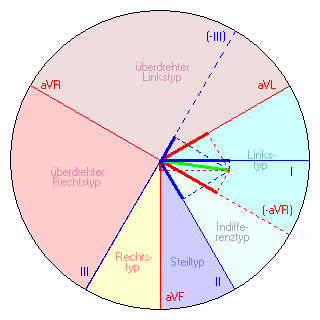

In [16]:
Image("Images/Cabrera.jpg")

The peaks' heights of the leads are drawn onto the according axes and connected through perpendicular lines.

### Angles

In [28]:
def angles(vector):
    """
    Returns angle between -180 and +180 degrees for a vector.
    """
    return -math.degrees(math.atan2(vector[1],vector[0]))

### Directions

In [29]:
def print_directions(code:str):
    """
    Returns the direction of each lead 
    
    Args
        :code: (str) Codified sequence
    Returns
        :returns: Prints direction of lead
    """
    assert len(code) == 6, f"Code length of 6 expected, got: {len(code)}"

    leads= ["I","II","III","aVR","aVL","aVF"]
    direction_mapping = {"0":"+","1":"-","2":"+/-","3":"-/+"}
    
    for i in range(6):
        print(leads[i]+" "+ direction_mapping[str(code)[i]])

### Axis deviation

In [30]:
def Lagetyp(deg):
    """
    Returns electrical axis deviation for an angle.
    
    Args
        :deg: (int) Angle in degrees
    Returns
        :returns: Prints direction and derivations with maximal magnitude
    """
    print("Angle: %s" % (np.round(deg,1)))

    if (-30 < deg < 30):
        print("Linkstyp/Horizontal axis")
        print_directions("001103")        
        print("I > aVL > II > aVF > III > aVR")
        print("Most important: I, aVL, -aVR")
        
    elif (30 < deg < 60):
        print("Indifferenztyp/Normal axis")
        print_directions("000100")  
        print("I > III")
        print("Most important: II, -aVR")
        
    elif (60 < deg < 90):
        print("Steiltyp/Vertical axis ")
        print_directions("000110") 
        print("III > I")
        print("Most important: II, aVF")
        
    elif (90 < deg < 120):
        print("Rechtstyp/Right axis")
        print_directions("100110") 
        print("Most important: III, aVF")
        
        
    elif (-150 < deg < -30):
        print("Überdrehter Linkstyp/Left axis deviation")
        print_directions("311231") 
        print("Most important: -II, -III")
        print("Most important: -aVF, -II, -III")
        
    else:
        print("Überdrehter Rechtstyp/Extreme right axis deviation")
        print_directions("130013")
        print("Most important: -I, -aVL")

### Example

In [35]:
Lagetyp(angles([0.5,-0.5]))

Angle: 45.0
Indifferenztyp/Normal axis
I +
II +
III +
aVR -
aVL +
aVF +
I > III
Most important: II, -aVR


In [36]:
Lagetyp(angles([0.7,-0.3]))

Angle: 23.2
Linkstyp/Horizontal axis
I +
II +
III -
aVR -
aVL +
aVF -/+
I > aVL > II > aVF > III > aVR
Most important: I, aVL, -aVR


In [37]:
Lagetyp(angles([0.2,-0.8]))

Angle: 76.0
Steiltyp/Vertical axis 
I +
II +
III +
aVR -
aVL -
aVF +
III > I
Most important: II, aVF
